In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [3]:
# Calculating each user average rating
userRatingDist = rating.groupby(['user_id']).mean().reset_index()
#userRatingDist.columns = ['user_id', 'average_rating_score']

In [4]:
userRatingDist.head()

,user_id,anime_id,rating
0,1,12888.483660,-0.712418
1,2,13459.000000,2.666667
2,3,13352.744681,7.382979
3,4,10135.403846,-1.000000
4,5,11023.301927,4.263383


In [5]:
URD1 = pd.merge(anime,rating,on=['anime_id','anime_id'])
URD2 = pd.merge(URD1,userRatingDist,on=['user_id','user_id'])
URD2= URD2[URD2.user_id <= 10000]

In [6]:
URD2 = URD2.drop(columns=["anime_id_y"])
URD2 = URD2.rename(columns = {"anime_id_x":"anime_id","rating_x":"overall_rating","rating_y":"user_rating","rating":"user_avg_rating"})
URD2.head(10)

,anime_id,name,genre,type,episodes,overall_rating,members,user_id,user_rating,user_avg_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,5.687023
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,99,10,5.687023
2,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,99,9,5.687023
3,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,99,10,5.687023
4,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888,99,9,5.687023
5,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254,99,9,5.687023
6,23273,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397,99,6,5.687023
7,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,99,9,5.687023
8,7311,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,8.81,240297,99,7,5.687023
9,2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi",TV,27,8.78,562962,99,8,5.687023


In [7]:
URD2['user_rating'].value_counts()

 8     220433
-1     193533
 7     184700
 9     169020
 10    124577
 6      86481
 5      38605
 4      14394
 3       5604
 2       3257
 1       2093
Name: user_rating, dtype: int64

In [8]:
URD2['user_rating'].value_counts()

 8     220433
-1     193533
 7     184700
 9     169020
 10    124577
 6      86481
 5      38605
 4      14394
 3       5604
 2       3257
 1       2093
Name: user_rating, dtype: int64

In [9]:
user_anime = pd.crosstab(URD2['user_id'], URD2['anime_id'])
user_anime.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34048,34085,34103,34107,34136,34173,34240,34283,34324,34325
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
user_anime2 = pd.pivot_table(
    URD2,values="user_rating",
    index="user_id",
    columns="name"
)

In [11]:
user_anime2

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,...,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
user_anime3 = user_anime2.fillna(0)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime3)
pca_samples = pca.transform(user_anime3)

In [14]:
user_gp = pd.DataFrame(pca_samples)
user_gp.head()

,0,1,2
0,-21.112792,-2.445999,1.230745
1,-18.533342,-3.024162,2.530634
2,4.884069,-14.540307,-14.954451
3,-20.909953,-2.604147,3.173141
4,28.486885,-8.663860,-1.749026


In [15]:
from sklearn.cluster import KMeans
distortions = []
K = []
for i in range(2,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(user_gp)
    distortions.append(kmeans2.inertia_)
    K.append(i)

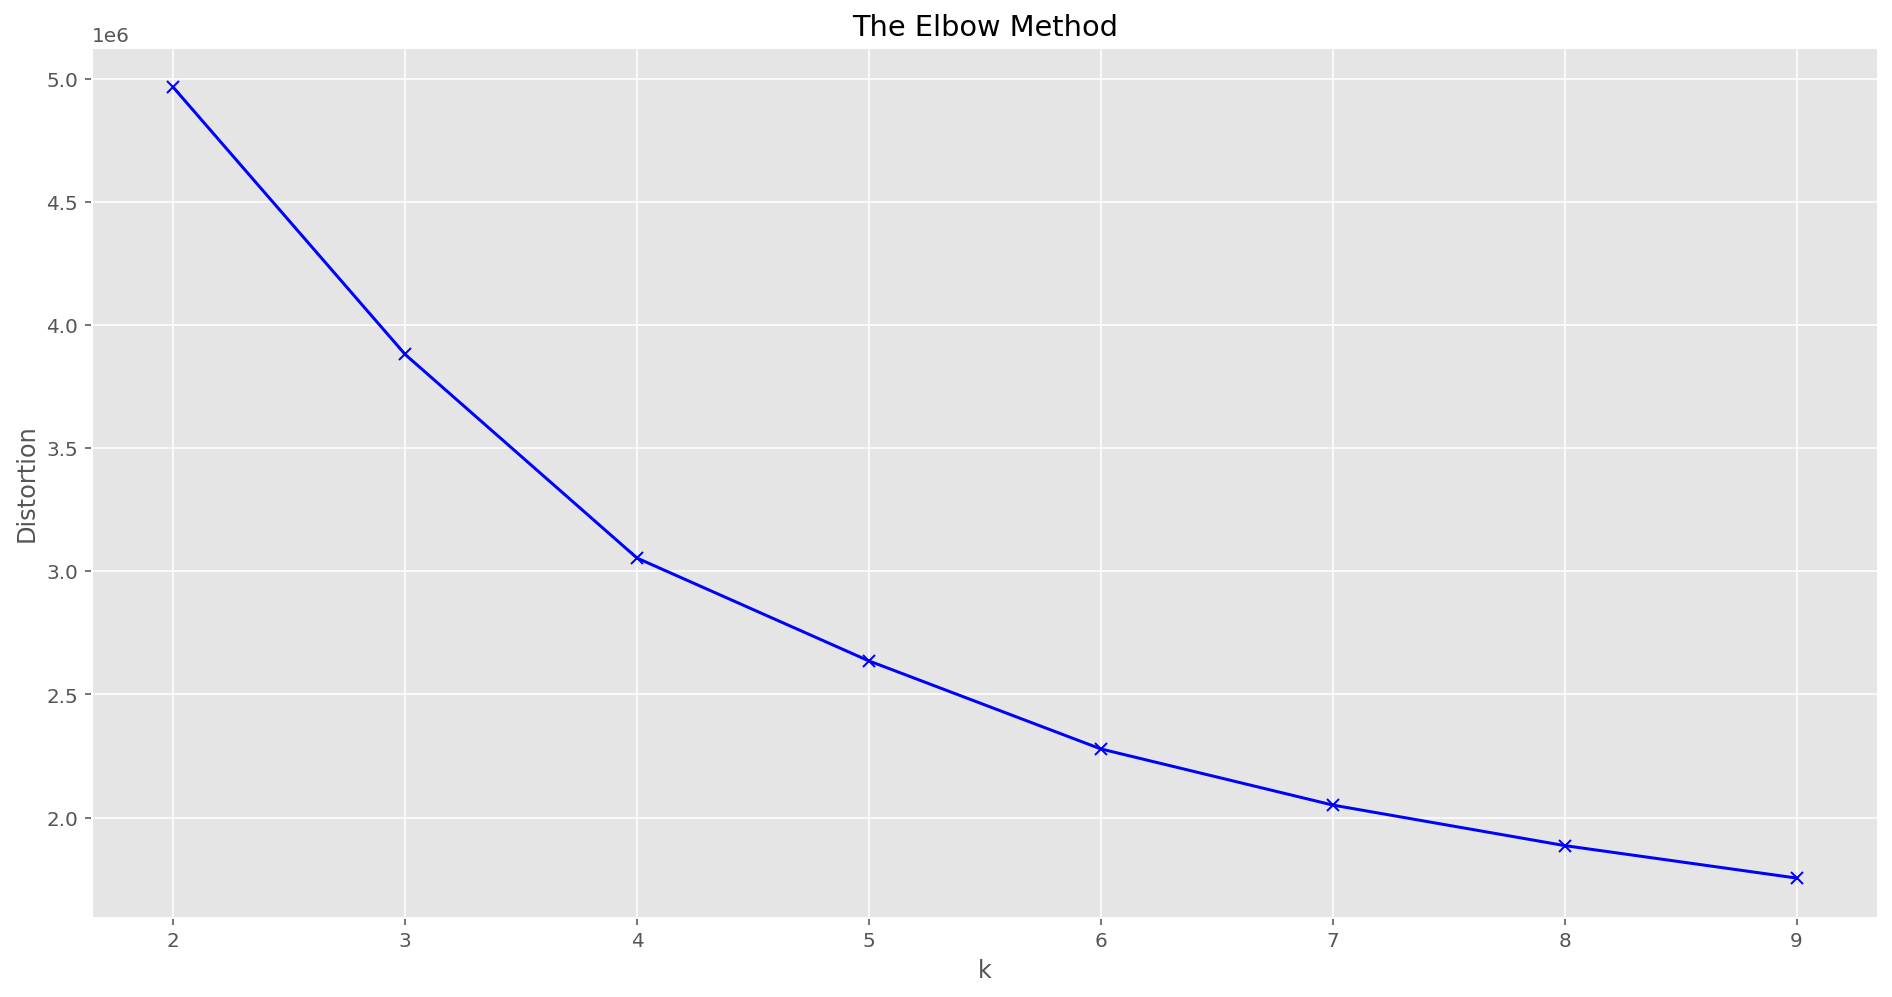

In [16]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [17]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=6,random_state=0).fit(user_gp)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(user_gp)

print(centers)

[[ 47.25937768 -24.74250172   2.75131547]
 [-14.48288496  -1.76206249   1.40262519]
 [ 12.38015619  -9.5135412   -6.52886465]
 [ 37.29831155  32.05923099   2.95875546]
 [105.9508213    1.81689935  14.74446957]
 [  0.9131605   14.17045443  -1.96230604]]


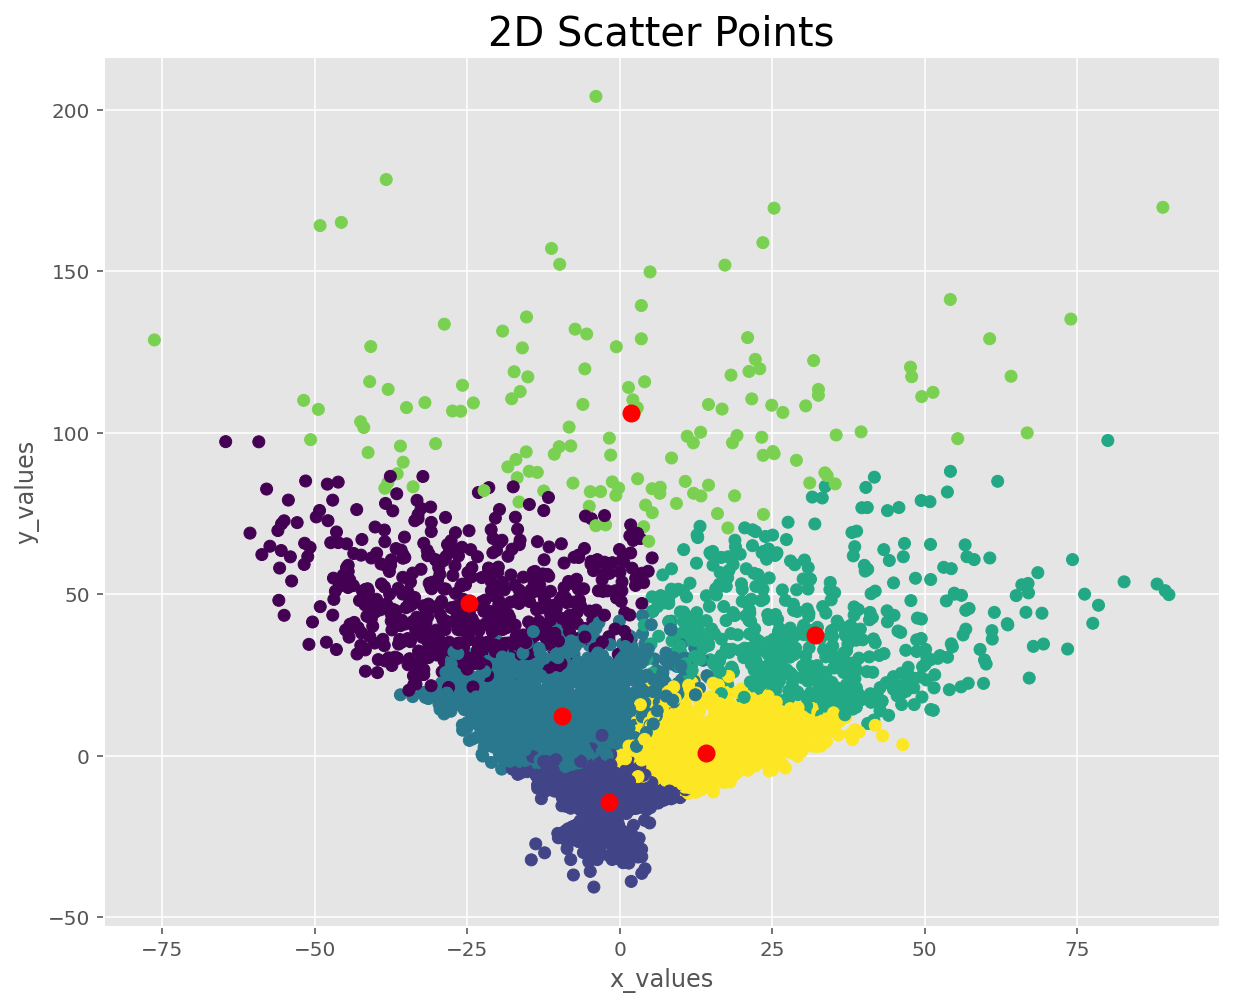

In [18]:
fig = plt.figure(figsize=(10,8))
plt.scatter(user_gp[1],user_gp[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('2D Scatter Points', fontsize=20)
plt.show()

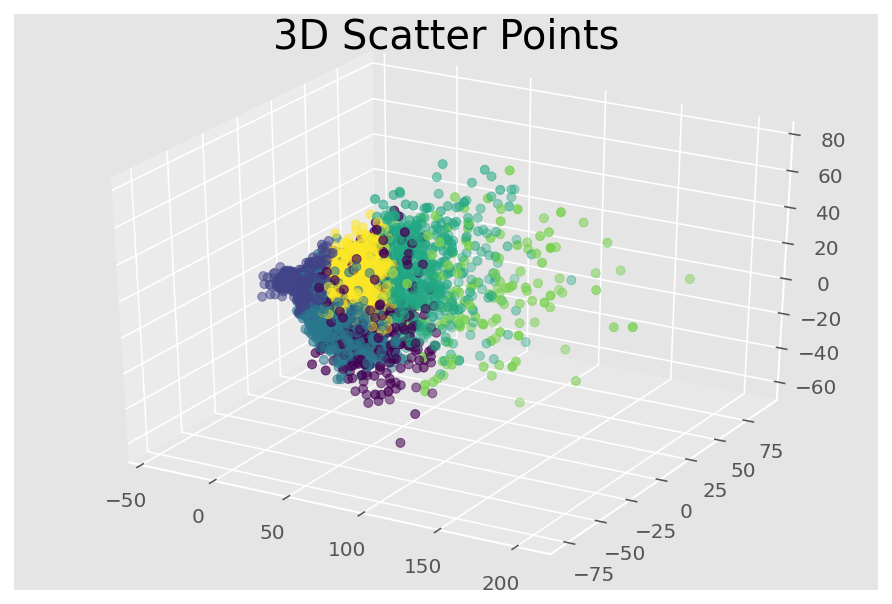

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(user_gp[0], user_gp[1], user_gp[2], c = c_preds)
plt.title('3D Scatter Points', fontsize=20)

plt.show()

In [20]:
user_anime3['cluster'] = c_preds


user_anime3.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [21]:
user_anime3["Shingeki no Kyojin"].mean()

3.1403

In [22]:
pd.DataFrame(c_preds).value_counts()

1    5676
2    1555
5    1523
0     575
3     535
4     136
dtype: int64

# Clusters

In [23]:
## Calculating each anime overall user rating within each cluster

In [24]:
c0 = user_anime3[user_anime3['cluster']==0].mean()

In [25]:
c0 = user_anime3[user_anime3['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime3[user_anime3['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime3[user_anime3['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime3[user_anime3['cluster']==3].drop('cluster',axis=1).mean()
c4 = user_anime3[user_anime3['cluster']==4].drop('cluster',axis=1).mean()
c5 = user_anime3[user_anime3['cluster']==5].drop('cluster',axis=1).mean()



In [26]:
df0 = pd.DataFrame(c0).reset_index().sort_values(by=[0], ascending = False)
df1 = pd.DataFrame(c1).reset_index().sort_values(by=[0], ascending = False)
df2 = pd.DataFrame(c2).reset_index().sort_values(by=[0], ascending = False)
df3 = pd.DataFrame(c3).reset_index().sort_values(by=[0], ascending = False)
df4 = pd.DataFrame(c4).reset_index().sort_values(by=[0], ascending = False)
df5 = pd.DataFrame(c5).reset_index().sort_values(by=[0], ascending = False)


In [27]:
df0 = df0.reset_index(drop=True).rename({0:"score"},axis = 1)
df1 = df1.reset_index(drop=True).rename({0:"score"},axis = 1)
df2 = df2.reset_index(drop=True).rename({0:"score"},axis = 1)
df3 = df3.reset_index(drop=True).rename({0:"score"},axis = 1)
df4 = df4.reset_index(drop=True).rename({0:"score"},axis = 1)
df5 = df5.reset_index(drop=True).rename({0:"score"},axis = 1)



In [28]:
print(type(df0.index[df0['name'] == "Kiseijuu: Sei no Kakuritsu"]))

<class 'pandas.core.indexes.numeric.Int64Index'>


In [29]:
df0.rename

<bound method DataFrame.rename of                                                    name     score
0                                       No Game No Life  7.760000
1                                      Sword Art Online  7.749565
2                                          Angel Beats!  7.445217
3                                    Shingeki no Kyojin  7.420870
4                                           Steins;Gate  6.526957
...                                                 ...       ...
8332                                  Renketsu Houshiki -0.005217
8333                                   Panchira Teacher -0.005217
8334       Front Innocent: Mou Hitotsu no Lady Innocent -0.005217
8335                                               Enbi -0.006957
8336  Ane Jiru The Animation: Shirakawa Sanshimai ni... -0.006957

[8337 rows x 2 columns]>

# Recommendation Results

In [30]:
def res(x):
    sc0 = df0.score[df0["name"] == x].tolist()
    sc1 = df1.score[df1["name"] == x].tolist()
    sc2 = df2.score[df2["name"] == x].tolist()
    sc3 = df3.score[df3["name"] == x].tolist()
    sc4 = df4.score[df4["name"] == x].tolist()
    sc5 = df5.score[df5["name"] == x].tolist()

    y = max(sc0, sc1, sc2, sc3, sc4, sc5)
    score=[sc0[0], sc1[0], sc2[0], sc3[0], sc4[0], sc5[0]]
    rcmd = {
        sc0[0]:df0,
        sc1[0]:df1,
        sc2[0]:df2,
        sc3[0]:df3,
        sc4[0]:df4,
        sc5[0]:df5
    }
    rcmd1 = {
        0:df0,
        1:df1,
        2:df2,
        3:df3,
        4:df4,
        5:df5
    }
    rcmd[y[0]]

    index = rcmd[y[0]].index[rcmd[y[0]]["name"] == x].tolist()

    list_name=[]
    index1=index[0]
    if index1 >=5 and index1<=(len(rcmd1[score.index(max(score))])-5):
        list_name.append(rcmd1[score.index(max(score))]['name'][(index1-5):index1])
        list_name.append(rcmd1[score.index(max(score))]['name'][index1+1:(index1+6)])
    elif index1 <5:
        list_name.append(rcmd1[score.index(max(score))]['name'][0:index1])
        list_name.append(rcmd1[score.index(max(score))]['name'][index1+1:11])
    else:
        list_name.append(rcmd1[score.index(max(score))]['name'][index1+1:len(rcmd1[score.index(max(score))])])
        list_name.append(rcmd1[score.index(max(score))]['name'][len(rcmd1[score.index(max(score))])-11: index1])

    rec_results = pd.DataFrame(list_name[0].tolist() + list_name[1].tolist(),columns = ["Recommended"])
    print(rec_results)

In [31]:
# test example: Kiseijuu: Sei no Kakuritsu
x = input()
res(x)

                                       Recommended
0  Mondaiji-tachi ga Isekai kara Kuru Sou Desu yo?
1                                         Sankarea
2                             Amagi Brilliant Park
3                                   Kimi ni Todoke
4                                           K-On!!
5                                       Usagi Drop
6                                  Higashi no Eden
7                                          Btooom!
8           Fate/stay night: Unlimited Blade Works
9                               Sora no Otoshimono
